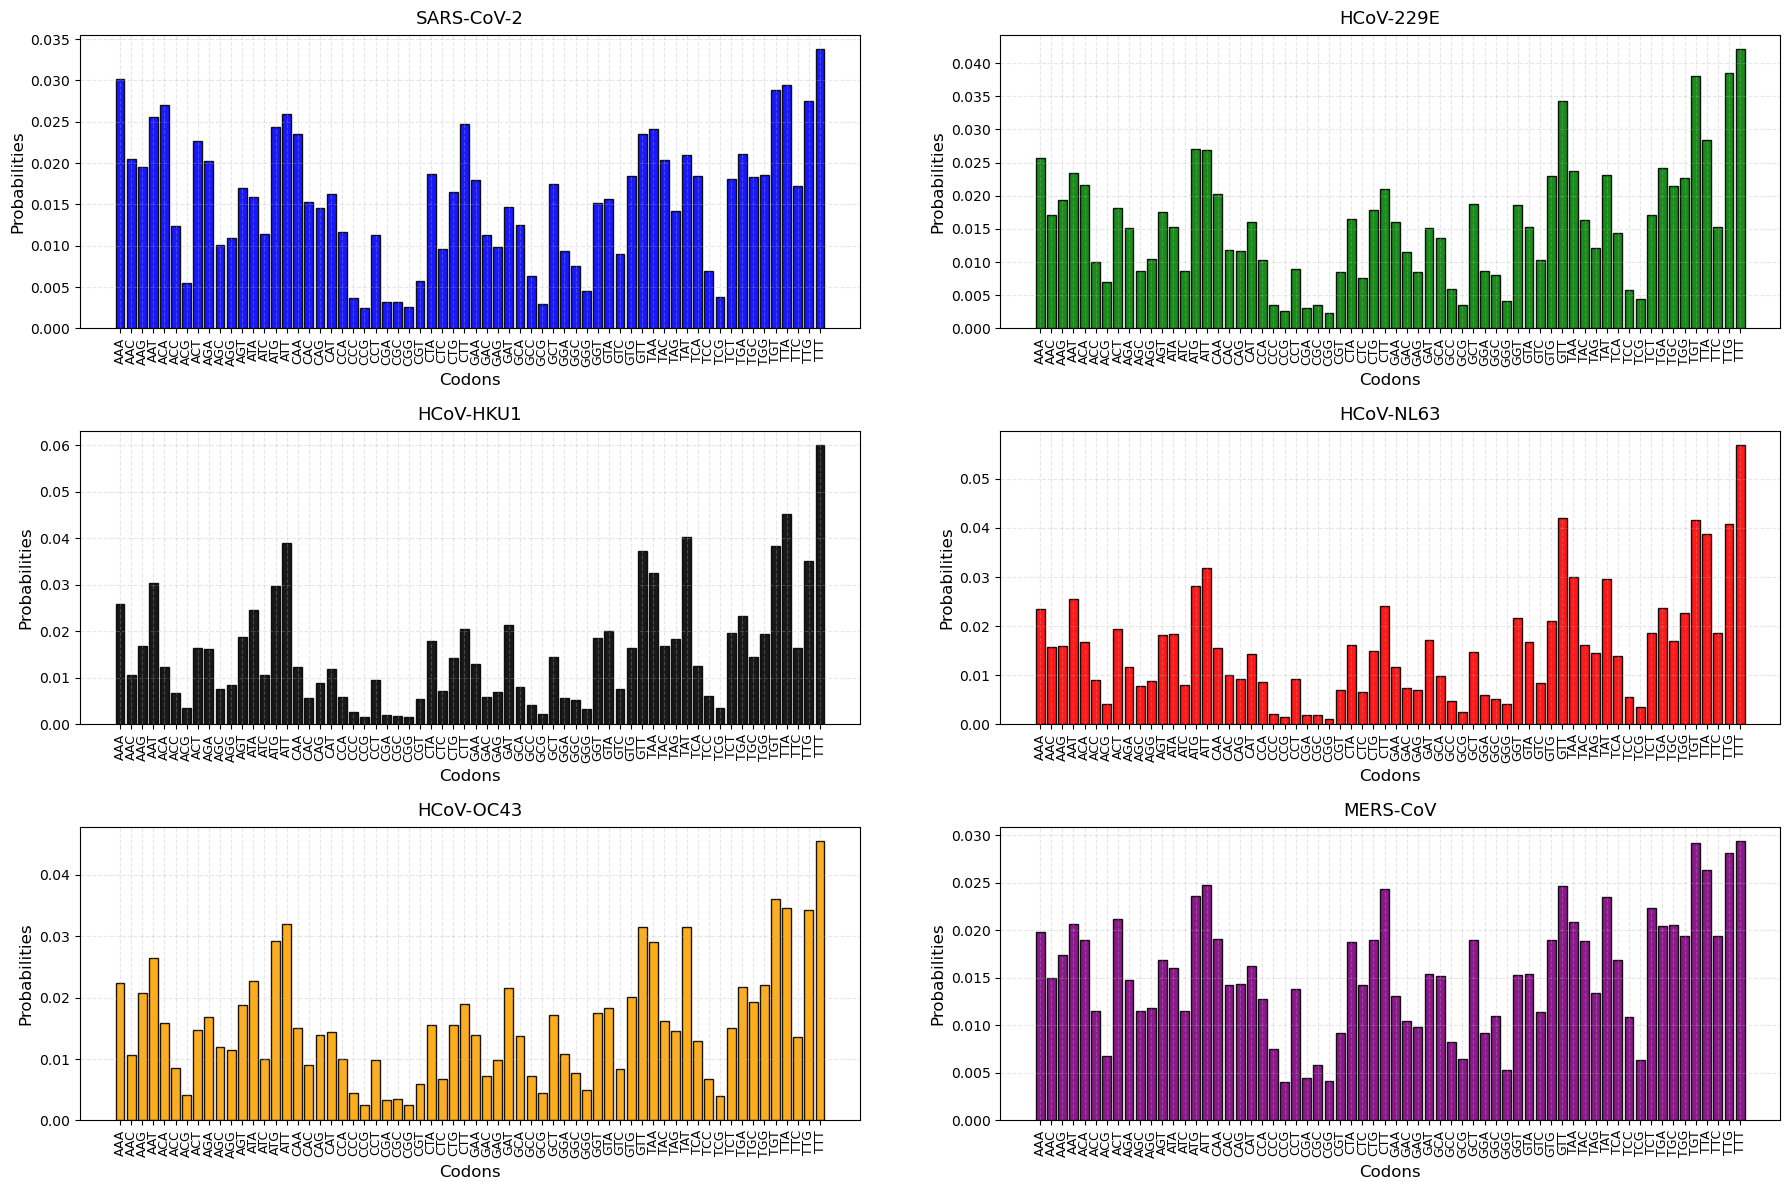

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fixed order of the 6 files
file_paths = [
    "probabilities_SARS-CoV-2.xlsx", 
    "probabilities_HCoV-229E.xlsx", 
    "probabilities_HCoV-HKU1.xlsx", 
    "probabilities_HCoV-NL63.xlsx", 
    "probabilities_HCoV-OC43.xlsx", 
    "probabilities_MERS-CoV.xlsx"
]

# Colors (one for each file, in the same order)
manual_colors = ['blue', 'green', 'black', 'red', 'orange', 'purple']

# Create a 3x2 panel
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

aminoacids_labels = None  # will store the codon labels (assuming they are the same in all)
title_names = []          # clean names for the titles

for i, file_path in enumerate(file_paths):
    # Read spreadsheet (Sheet1)
    sheet_data = pd.read_excel(file_path, sheet_name='Sheet1')

    # Take only the probability columns (from the 2nd onward)
    data = sheet_data.iloc[:, 1:].astype(float)
    aminoacids = sheet_data.columns[1:]

    # Store codon labels only once
    if aminoacids_labels is None:
        aminoacids_labels = list(aminoacids)

    # Mean probability per codon (if there are multiple rows)
    mean_probs = data.mean(axis=0)

    # X-axis
    x = np.arange(len(aminoacids_labels))

    # Short name for title/legend
    short_name = (file_path
                  .replace('probabilities_', '')
                  .replace('.xlsx', ''))
    title_names.append(short_name)

    # Plot in the corresponding subplot
    ax = axes[i]
    ax.bar(x, mean_probs.values,
           color=manual_colors[i],
           edgecolor='black',
           alpha=0.9)

    # Axes and formatting
    ax.set_xlabel('Codons', fontsize=12)
    ax.set_ylabel('Probabilities', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(aminoacids_labels, rotation=90, fontsize=9)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_title(short_name, fontsize=13, pad=8)

# Remove empty subplots if any
for j in range(len(file_paths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.18)  # spacing between subplots
plt.savefig('Codon Probabilities Bar Chart Panel.png', dpi=300, bbox_inches='tight')
plt.show()
